<a href="https://colab.research.google.com/github/tinySculpture/STINTSY-Project/blob/master/Project_Labor_Force_Survey-colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> ## **Group 8 - STINTSY S17**
> Members:
> - CRUZ, GIOVANNI JONATHAN
> - LIM, NATHAN MIGUEL
> - LUISTRO, JOSIAH MARI
> - MANGAWANG, FELIX MELFORD

---

# Introduction

## Labor Force Survey 2016

Taken from the Philippine Statistics Authority (PSA), the dataset is a survey conducted in 2016 with respect in Demographic, Economic Characteristics and Past Quarter Activities of the surveyed individuals in this dataset.

The group picked this dataset over the family dataset because of its recency (2016 over 2012), simplicity of raw data (50 columns instead of 116), and most importantly a general group interest on the labor force dataset as a whole.

## Task

With this, the group decided to make a classification task with a target variable of `PUFC23_PCLASS`. This variable is described on the website as the Class of Worker on their Primary Occupation.

This variable has 6 different values listed in the value set, namely:
0. Worked for private household
1. Worked for private establishment
2. Worked for government/government corporation
3. Self-employed without any paid employee
4. Employer in own family-operated farm or business
5. Worked with pay on own family-operated farm or business
6. Worked without pay on own family-operated farm or business

To briefly explain, the variable is the catgory of the person's relationship to the establishment he works in. According to the [data dictionary](https://psada.psa.gov.ph/catalog/67/data-dictionary/F1?file_name=lfs_april2016), this is referred to as the "Industrial Status" in other countries.

# Description of the Dataset

The survey covers individuals aged 15 years and older and provides insights into labor market trends at both national and regional levels (17 administrative regions). Key variables include employment status, industry, occupation, hours worked, and demographic details like age, sex, and education.

The data was collected through face-to-face interviews administered to 42,768 sample households. Considering how many people are in a single household, the total of 180,862 data points makes sense.

The 2013 Master Sample (MS) was used, with Primary Sampling Units (PSUs) stratified by geographic location, household wealth, and overseas worker prevalence.

The dataset has different key characteristics that can be inferred:
> Demographic Characteristics:
>
> - Household ID
> - Age
> - Sex
> - Marital Status
> - Highest Grade Completed
> - Overseas Worker Indicator

> Economic Characteristics:
>
> - Employment Status
> - Industry Group
> - Occupation
> - Hours Worked
> - Job Search Method


> Geographic Coverage:
>
> - Region
> - Urban/Rural

> Other Notable Features:
>
> - Class of Worker
> - Household Head Indicators



# Python libraries and modules used.


| LIBRARY | PURPOSE |
| ------- | ------- |
| pandas | Data table manipulation |
| numpy | Matrix operations |
| ydata_profiling | Create a report for easier EDA |
| sklearn | Mostly used for preprocessing, also used for making models |
| matplotlib | Plot graphs and visualize data |
| imblearn | To do SMOTE on imbalanced data |

> ⚠ **Run these when using Google Colab**

In [1]:
# Run for google colab
!git clone https://github.com/tinySculpture/STINTSY-Project.git
%cd STINTSY-Project/

Cloning into 'STINTSY-Project'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 115 (delta 46), reused 67 (delta 20), pack-reused 0 (from 0)
Receiving objects: 100% (115/115), 22.65 MiB | 10.20 MiB/s, done.
Resolving deltas: 100% (46/46), done.
/content/STINTSY-Project


In [1]:
%cd STINTSY-Project/

/content/STINTSY-Project


In [5]:
!pip install ydata-profiling --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 50.5 MB/s eta 0:00:00


> ⚠ End of Cells for Google Colab

In [2]:
%load_ext autoreload
%autoreload 2

# Import libraries
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Data Preprocessing

The data preprocessing, cleaning and Exploratory Data Analysis (EDA) will be done in basically one continous chapter. This is so the data can be processed and changed while doing the EDA at the same time to see its effects to the dataset during runtime instead of at the end.

## Read dataset

In [3]:
df = pd.read_csv("LFS PUF April 2016.CSV")

## Create a Profile Report
Using ydata-profiling, we can generate a profile report to get an overview of the dataset. A function can be defined to generate the report and save it as an HTML file.

This function will be reused to create more reports after doing significant changes on the dataset's features and data points.

In [4]:
def generate_report(dataframe, filename=""):
    report = ProfileReport(dataframe)
    report.to_file(filename + ".html")

In [ ]:
generate_report(df, 'report-raw')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 50/50 [00:05<00:00,  8.40it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Data Cleaning

1. Force Missing Values to NaN to correctly identify missing values because of different data types. (Int, Float, and Object)
2. Delete duplicated rows (keep the first instance)

There are missing data that are represented as different invisible characters - replace them with an empty string

In [5]:
df.isna().sum()

,0
PUFREG,0
PUFPRV,0
PUFPRRCD,0
PUFHHNUM,0
PUFURB2K10,0
PUFPWGTFIN,0
PUFSVYMO,0
PUFSVYYR,0
PUFPSU,0
PUFRPL,0


In [6]:
# Some of the mising data are not null, instead they are invisible characters which may not be simple spaces or tabs.
# This will strip the data point (remove special characters) so we can check the actual cells with no data.
df = df.map(lambda x: np.nan if isinstance(x, str) and x.strip() == "" else x)

#### Sanity Checking
Check if missing data is properly replaced with NaN.

There should be no columns with empty strings or invisible characters.

In [7]:
df.isna().sum()

,0
PUFREG,0
PUFPRV,0
PUFPRRCD,0
PUFHHNUM,0
PUFURB2K10,0
PUFPWGTFIN,0
PUFSVYMO,0
PUFSVYYR,0
PUFPSU,0
PUFRPL,0


### Impute missing values

- Fill numerical columns with their *mean*.
- Fill categorical values with their *mode*.

The default imputation method the group decided to use is filling the numerical variables with their mean and categorical variables with their mode. This is done mainly for ease of imputation, and its simplicity. However, the group is aware that there are ways to fill the null values such as KNN imputation, however, it would be more computationally expensive. for the number of data points and features in the dataset.

In [8]:
# Replace numeric values with mean
df.fillna(df.select_dtypes(include=["number"]).mean(numeric_only=True), inplace=True)

# Replace categorical values with mode
for col in df.select_dtypes(include=["object"]):
    mode_value = df[col].mode()[0] if not df[col].mode().empty else "unknown"
    df[col] = df[col].fillna(mode_value)

df

,PUFREG,PUFPRV,PUFPRRCD,PUFHHNUM,PUFURB2K10,PUFPWGTFIN,PUFSVYMO,PUFSVYYR,PUFPSU,PUFRPL,...,PUFC33_WEEKS,PUFC34_WYNOT,PUFC35_LTLOOKW,PUFC36_AVAIL,PUFC37_WILLING,PUFC38_PREVJOB,PUFC40_POCC,PUFC41_WQTR,PUFC43_QKB,PUFNEWEMPSTAT
0,1,28,2800,1,2,405.2219,4,2016,217,1,...,002,7,1,1,1,1,52,1,01,1
1,1,28,2800,1,2,388.8280,4,2016,217,1,...,002,7,1,1,1,1,52,1,01,1
2,1,28,2800,1,2,406.1194,4,2016,217,1,...,002,7,1,1,1,1,52,1,01,1
3,1,28,2800,2,2,405.2219,4,2016,217,1,...,002,7,1,1,1,1,52,1,01,1
4,1,28,2800,2,2,384.3556,4,2016,217,1,...,002,7,1,1,1,1,52,1,96,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180857,17,59,5900,40880,2,239.4341,4,2016,258,1,...,002,7,1,1,1,1,52,1,50,1
180858,17,59,5900,40880,2,189.8885,4,2016,258,1,...,002,8,1,1,1,2,52,1,01,3
180859,17,59,5900,40880,2,207.7395,4,2016,258,1,...,002,7,1,1,1,1,52,1,01,1
180860,17,59,5900,40880,2,207.7395,4,2016,258,1,...,002,7,1,1,1,1,52,1,01,1


In [9]:
df.isna().sum()

,0
PUFREG,0
PUFPRV,0
PUFPRRCD,0
PUFHHNUM,0
PUFURB2K10,0
PUFPWGTFIN,0
PUFSVYMO,0
PUFSVYYR,0
PUFPSU,0
PUFRPL,0


### Delete Unnecessary Columns

- Delete constant values (Month, Year)
    - PUFSVYYR
    - PUFSVYMO
- Delete IDs
    - PUFPRRCD (-0.035)
    - PUFHHNUM (0.021)
    - PUFREG (0.020)
- Delete Columns with low correlation to target variable (Within -0.05 to +0.05)
    - PUF10_CONWR (0.037)
    - PUFC14_PROCC (-0.490)
    - PUFC25_PBASIC (0.035)
    - PUFC27_NJOBS (0.035)
    - PUFC31_FLWRK (0.026)
    - PUFC32_JOBSM (0.031)
    - PUFC33_WEEKS (-0.014)
    - PUFC34_WYNOT (-0.019)
    - PUFC35_LTLOOKW (0.026)
    - PUFC37_WILLING (0.046)
    - PUFPRV (-0.035)
    - PUFRPL (0.004)
- Delete data not useful for prediction
    - PUFC41_WQTR - Work in the previous quarter
    - PUFC43_QKB - Kind of business in the previous quarter
    - PUFC40_POCC - Previous occupation if unemployed (we need employment class)
    - PUFWGTFIN - Weight used for surveying
    - PUFPSU - Primary Sampling Unit (PSU) useful for survey design but not for prediction
    - PUFC12_JOB - PUFC11_WORK is more useful
    - PUFC36_AVAIL - Availability for work (useful for unemployed people)
    - PUFC19_PHOURS - Hours worked in the previous week
    - PUFC38_PREVJOB - Previous job if employed (we need current job)

In [10]:
drop_cols = [
    # IDs, Constants
    "PUFSVYYR", "PUFSVYMO", "PUFPRRCD", "PUFHHNUM", "PUFREG",
    # Low correlation
    "PUFC01_LNO", "PUFC10_CONWR", "PUFC14_PROCC", "PUFC25_PBASIC", "PUFC27_NJOBS", "PUFC31_FLWRK", "PUFC32_JOBSM", "PUFC33_WEEKS", "PUFC34_WYNOT", "PUFC35_LTLOOKW", "PUFC37_WILLING", "PUFPRV", "PUFRPL",
    # Not useful for prediction of type of worker
    "PUFC41_WQTR", "PUFC43_QKB", "PUFC40_POCC", "PUFPWGTFIN", "PUFC12_JOB", "PUFC36_AVAIL", "PUFC19_PHOURS", "PUFC38_PREVJOB"
]
df.drop(columns=drop_cols, inplace=True)

In [11]:
df

,PUFURB2K10,PUFPSU,PUFHHSIZE,PUFC03_REL,PUFC04_SEX,PUFC05_AGE,PUFC06_MSTAT,PUFC07_GRADE,PUFC08_CURSCH,PUFC09_GRADTECH,...,PUFC20_PWMORE,PUFC21_PLADDW,PUFC22_PFWRK,PUFC23_PCLASS,PUFC24_PBASIS,PUFC26_OJOB,PUFC28_THOURS,PUFC29_WWM48H,PUFC30_LOOKW,PUFNEWEMPSTAT
0,2,217,3,1,1,49,2,350,1,2,...,1,1,2,3,4,1,032,1,2,1
1,2,217,3,2,2,61,2,350,1,2,...,2,2,2,6,4,2,008,1,2,1
2,2,217,3,3,1,19,1,350,2,2,...,1,1,2,1,3,1,034,1,2,1
3,2,217,4,1,1,48,2,320,1,2,...,1,1,2,3,4,1,033,1,2,1
4,2,217,4,2,2,41,2,350,1,2,...,2,2,2,0,4,2,072,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180857,2,258,5,1,1,29,2,350,1,2,...,2,2,2,4,4,2,040,1,2,1
180858,2,258,5,2,2,29,2,830,1,2,...,2,2,2,1,4,2,048,1,2,3
180859,2,258,5,3,2,4,1,350,1,2,...,2,2,2,1,4,2,048,1,2,1
180860,2,258,5,3,2,2,1,350,1,2,...,2,2,2,1,4,2,048,1,2,1


#### Recheck EDA

Check if the data has been changed significantly, and if the statistical tests are still the same after imputation and feature reduction.

In [ ]:
generate_report(df, "report-cleaned")

After checking the EDA again, duplicate data is present since there are columns that have been deleted.

In [12]:
print("Duplicates: ", df.duplicated().sum())

Duplicates:  4270


In [13]:
df = df.drop_duplicates()
print("Duplicates after dropping: ", df.duplicated().sum())

Duplicates after dropping:  0


### Binning and Encoding

- One-hot encode categorical values
- Label encode values if ordinality is not an issue

The goal is to turn all variables into numerical variables so we can use the dataset on to any model without any issues.

In [14]:
# One hot encode binary categorical columns
cat_cols = ['PUFURB2K10', 'PUFC04_SEX', 'PUFC08_CURSCH', 'PUFC09_GRADTECH', 'PUFC11_WORK', 'PUFC20_PWMORE', "PUFC21_PLADDW", 'PUFC22_PFWRK', 'PUFC26_OJOB', "PUFC30_LOOKW"]

df = pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype=float)
df = df.rename(
    columns = {
        "PUFURB2K10_2": "Is_Rural",
        "PUFC04_SEX_2": "Is_Female",
        "PUFC08_CURSCH_2": "Is_Not_In_School",
        "PUFC09_GRADTECH_2": "Is_Not_In_Techvoc",
        "PUFC11_WORK_2": "Is_Not_Working",
        "PUFC20_PWMORE_2": "Has_Not_Wanted_More_Hours",
        "PUFC21_PLADDW_2": "Has_Not_Looked_For_Work",
        "PUFC22_PFWRK_2": "Is_Not_First_Time",
        "PUFC26_OJOB_2": "No_Other_Job",
        "PUFC30_LOOKW_2": "Has_Not_Looked_For_Work_Week"
    }
)

In [19]:
def one_hot_encode(df, df_col, df_new_col, category_map):
  print("Duplicates before: ", df.duplicated().sum())
  df[df_new_col] = df[df_col].apply(category_map)

  # One hot encode the new categories
  encoder = OneHotEncoder(sparse_output=False, drop="first")
  encoded = encoder.fit_transform(df[[df_new_col]])
  encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out([df_new_col]), index=df.index)

  df = df.drop(columns=[df_col, df_new_col])

  new_df = pd.concat([df, encoded_df], axis=1)
  print("Duplicates after: ", new_df.duplicated().sum())
  print("NaN Count: ", new_df.isna().sum())
  return new_df

#### PUFC07_GRADE
This classification data contains a lot of values in the value set. It can be noticed that there are different values for highest educational attainment and the program category. Since they are only one column, it might be better to encode the highest educational attainment as an ordinal encoded variable, and the program category as 15 different categories instead of 50+.

In [16]:
education_categories = {
    "Primary": ["000", "010", "210", "220", "230", "240", "250", "260", "280"],
    "Secondary": ["310", "320", "330", "340", "350"],
    "Post-Secondary": ["410", "420", "810", "820", "830", "840", "900"],
    "STEM": ["542", "544", "548", "552", "554", "558", "562", "564", "572", "642", "644", "646", "648", "652", "654", "658", "662", "664", "672"],
    "Business": ["534", "634", "638"],
    "Art": ["521", "522", "531", "532", "621", "622", "631", "632"],
    "Other": ["501", "508", "509", "514", "576", "581", "584", "585", "586", "601", "614", "676", "681", "684", "685", "686", "589", "689"]
}


def get_education_category(x):
    for key, values in education_categories.items():
        if x in values:
            return key
    return "Unknown"

In [17]:
df = one_hot_encode(df, "PUFC07_GRADE", "Education", get_education_category)

Duplicates before:  0
Duplicates after:  2270


#### PUFC16_PKB
The valueset offers a binning for this column already. The values are binned into 3 categories: Agriculture, Industry, Services.

In [20]:
industry_categories = {
    "Agriculture": range(1, 3),
    "Industry": range(5, 43),
    "Services": range(45, 99)
}

def get_industry_category(x):
    for key, values in industry_categories.items():
        if x in values:
            return key
    return "Unknown"

In [21]:
df = one_hot_encode(df, "PUFC16_PKB", "KindOfBusiness", get_industry_category)

Duplicates before:  2270
Duplicates after:  2301
NaN Count:  PUFPSU                          0
PUFHHSIZE                       0
PUFC03_REL                      0
PUFC05_AGE                      0
PUFC06_MSTAT                    0
PUFC17_NATEM                    0
PUFC18_PNWHRS                   0
PUFC23_PCLASS                   0
PUFC24_PBASIS                   0
PUFC28_THOURS                   0
PUFC29_WWM48H                   0
PUFNEWEMPSTAT                   0
Is_Rural                        0
Is_Female                       0
Is_Not_In_School                0
Is_Not_In_Techvoc               0
Is_Not_Working                  0
Has_Not_Wanted_More_Hours       0
Has_Not_Looked_For_Work         0
Is_Not_First_Time               0
No_Other_Job                    0
Has_Not_Looked_For_Work_Week    0
Education_Business              0
Education_Other                 0
Education_Post-Secondary        0
Education_Primary               0
Education_STEM                  0
Education_Secondary  

#### PUFC29_WWM48H
One hot encode based on the given reasons for working more than 48 hours.

1. Want - Wanted more earnings
2. Requirement - Requirements of the job
3. Exceptional - Exceptional week
4. Passion - Ambition, passion for job
5. Other - Other reasons


In [22]:
reason_categories = {
    'Want': "1",
    'Requirement': "2",
    'Exceptional': "3",
    'Passion': "4",
    'Other': "5"
}

def get_reason_category(x):
    for key, value in reason_categories.items():
        if x == value:
            return key

    return "Unknown"

df_col = "PUFC29_WWM48H"
df_new_col = "Work48H"

In [23]:
df = one_hot_encode(df, "PUFC29_WWM48H", "Work48H", get_reason_category)

Duplicates before:  2301
Duplicates after:  2301
NaN Count:  PUFPSU                          0
PUFHHSIZE                       0
PUFC03_REL                      0
PUFC05_AGE                      0
PUFC06_MSTAT                    0
PUFC17_NATEM                    0
PUFC18_PNWHRS                   0
PUFC23_PCLASS                   0
PUFC24_PBASIS                   0
PUFC28_THOURS                   0
PUFNEWEMPSTAT                   0
Is_Rural                        0
Is_Female                       0
Is_Not_In_School                0
Is_Not_In_Techvoc               0
Is_Not_Working                  0
Has_Not_Wanted_More_Hours       0
Has_Not_Looked_For_Work         0
Is_Not_First_Time               0
No_Other_Job                    0
Has_Not_Looked_For_Work_Week    0
Education_Business              0
Education_Other                 0
Education_Post-Secondary        0
Education_Primary               0
Education_STEM                  0
Education_Secondary             0
Work48H_Other        

#### PUFNEWEMPSTAT
One hot encode the categories if the individual is employed, not employed, or not in workforce.

In [24]:
workforce_categories = {
    'Employed': "1",
    'Unemployed': "2",
    'NotInWorkForce': "3",
}

def get_workforce_category(x):
    for key, value in workforce_categories.items():
        if x == value:
            return key

    return "Unknown"


In [25]:
df = one_hot_encode(df, "PUFNEWEMPSTAT", "Employment_Status", get_workforce_category)

Duplicates before:  2301
Duplicates after:  2301
NaN Count:  PUFPSU                              0
PUFHHSIZE                           0
PUFC03_REL                          0
PUFC05_AGE                          0
PUFC06_MSTAT                        0
PUFC17_NATEM                        0
PUFC18_PNWHRS                       0
PUFC23_PCLASS                       0
PUFC24_PBASIS                       0
PUFC28_THOURS                       0
Is_Rural                            0
Is_Female                           0
Is_Not_In_School                    0
Is_Not_In_Techvoc                   0
Is_Not_Working                      0
Has_Not_Wanted_More_Hours           0
Has_Not_Looked_For_Work             0
Is_Not_First_Time                   0
No_Other_Job                        0
Has_Not_Looked_For_Work_Week        0
Education_Business                  0
Education_Other                     0
Education_Post-Secondary            0
Education_Primary                   0
Education_STEM             

#### PUFC17_NATEM
One hot encode the categories if permanent, short-term, or different employer.

In [26]:
nature_categories = {
    "Permanent": "1",
    "Short-Term": "2",
    "Different_Employer": "3",
}

def get_nature_category(x):
    for key, value in nature_categories.items():
        if x == value:
            return key

    return "Unknown"

In [27]:
df = one_hot_encode(df, "PUFC17_NATEM", "NatureOfEmployment", get_nature_category)

Duplicates before:  2301
Duplicates after:  2301
NaN Count:  PUFPSU                              0
PUFHHSIZE                           0
PUFC03_REL                          0
PUFC05_AGE                          0
PUFC06_MSTAT                        0
PUFC18_PNWHRS                       0
PUFC23_PCLASS                       0
PUFC24_PBASIS                       0
PUFC28_THOURS                       0
Is_Rural                            0
Is_Female                           0
Is_Not_In_School                    0
Is_Not_In_Techvoc                   0
Is_Not_Working                      0
Has_Not_Wanted_More_Hours           0
Has_Not_Looked_For_Work             0
Is_Not_First_Time                   0
No_Other_Job                        0
Has_Not_Looked_For_Work_Week        0
Education_Business                  0
Education_Other                     0
Education_Post-Secondary            0
Education_Primary                   0
Education_STEM                      0
Education_Secondary        

After One Hot Encoding, it can be noticed that there are duplicate data. This comes from the fact that generalizing the data makes some data points be copies of others.

In [28]:
df.duplicated().sum()

np.int64(2301)

In [30]:
df.drop_duplicates()

,PUFPSU,PUFHHSIZE,PUFC03_REL,PUFC05_AGE,PUFC06_MSTAT,PUFC18_PNWHRS,PUFC23_PCLASS,PUFC24_PBASIS,PUFC28_THOURS,Is_Rural,...,Education_STEM,Education_Secondary,Work48H_Other,Work48H_Passion,Work48H_Requirement,Work48H_Want,Employment_Status_NotInWorkForce,Employment_Status_Unemployed,NatureOfEmployment_Permanent,NatureOfEmployment_Short-Term
0,217,3,1,49,2,08,3,4,032,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,217,3,2,61,2,04,6,4,008,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,217,3,3,19,1,08,1,3,034,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,217,4,1,48,2,04,3,4,033,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,217,4,2,41,2,12,0,4,072,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180857,258,5,1,29,2,08,4,4,040,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
180858,258,5,2,29,2,08,1,4,048,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
180859,258,5,3,4,1,08,1,4,048,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
180860,258,5,3,2,1,08,1,4,048,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


#### Label Encoding

Label encode remaining variables with more than 2 categories that can be ordered.

In [31]:
encoder = LabelEncoder()
df["Marital_Status"] = encoder.fit_transform(df["PUFC06_MSTAT"]).astype('int64')
df["Working_Hours_Per_Week"] = encoder.fit_transform(df["PUFC18_PNWHRS"]).astype('int64')
df["Class_Of_Worker"] = encoder.fit_transform(df["PUFC23_PCLASS"]).astype('int64')
df["Payment_Basis"] = encoder.fit_transform(df["PUFC24_PBASIS"]).astype('int64')

This is not label encoding per se, but it is turning the available text data into numerical. No need to one-hot encode.

In [32]:
df["Hours_Work_Total"] = pd.to_numeric(df["PUFC28_THOURS"], errors="coerce").astype('int64')

In [33]:
df.drop(columns=["PUFC06_MSTAT", "PUFC18_PNWHRS", "PUFC23_PCLASS", "PUFC24_PBASIS", "PUFC28_THOURS"], inplace=True)

#### Rename Remaining Variables
The last step is to rename the remaining variables that are untouched. This is for ease of use and for ease of interpretation.

In [34]:
df = df.rename(columns={
    "PUFHHSIZE": "Household_Size",
    "PUFC03_REL": "Relationship",
    "PUFC05_AGE": "Age",
})

In [35]:
df.duplicated().sum()

np.int64(2301)

In [37]:
df.drop_duplicates()

,PUFPSU,Household_Size,Relationship,Age,Is_Rural,Is_Female,Is_Not_In_School,Is_Not_In_Techvoc,Is_Not_Working,Has_Not_Wanted_More_Hours,...,Work48H_Want,Employment_Status_NotInWorkForce,Employment_Status_Unemployed,NatureOfEmployment_Permanent,NatureOfEmployment_Short-Term,Marital_Status,Working_Hours_Per_Week,Class_Of_Worker,Payment_Basis,Hours_Work_Total
0,217,3,1,49,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1,7,3,4,32
1,217,3,2,61,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1,3,6,4,8
2,217,3,3,19,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0,7,1,3,34
3,217,4,1,48,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1,3,3,4,33
4,217,4,2,41,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1,11,0,4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180857,258,5,1,29,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1,7,4,4,40
180858,258,5,2,29,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1,7,1,4,48
180859,258,5,3,4,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0,7,1,4,48
180860,258,5,3,2,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0,7,1,4,48


In [ ]:
generate_report(df, "report-encoded")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 32/32 [00:01<00:00, 25.91it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Transformation
This is to apply different techniques to normalize the data and make it more suitable for machine learning models.

In [38]:
from data_transformation import DataTransformer

DT = DataTransformer(df)
DT.transform_data()

This shows the skewed columns that have been transformed.

In [ ]:
DT.scale_features()

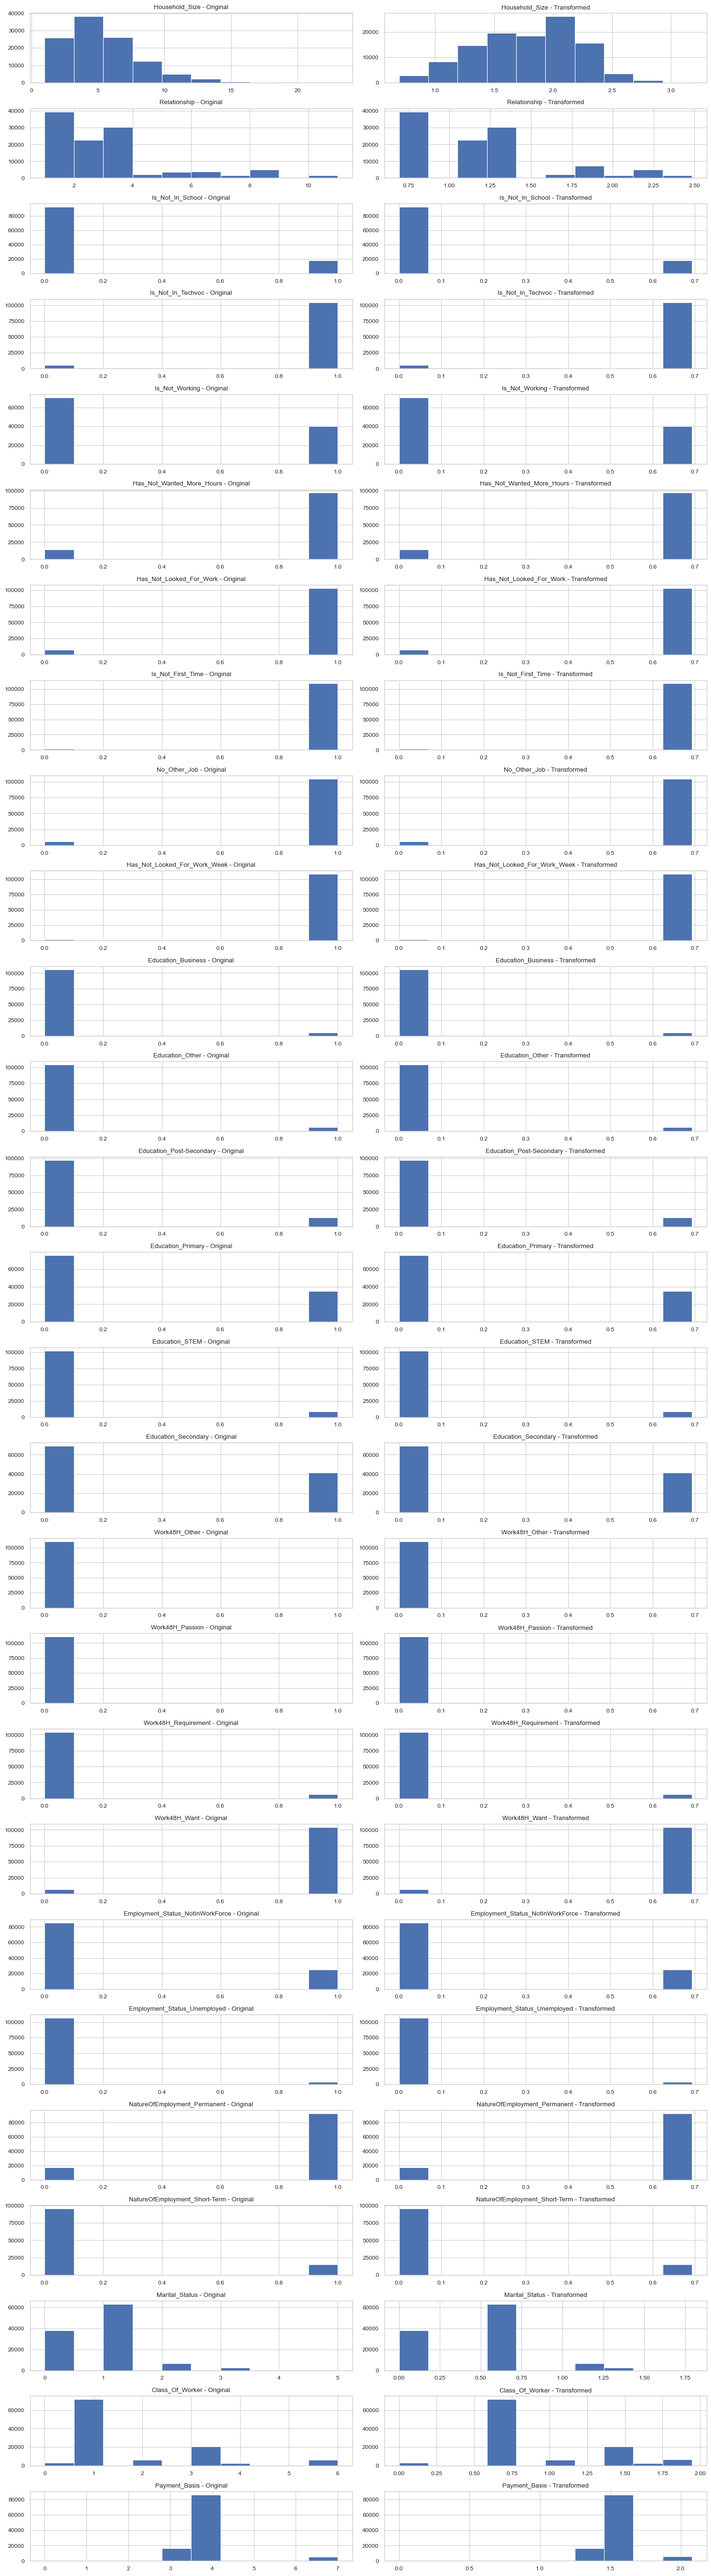

In [ ]:
DT.visualize()

This shows the scaled columns after transformation.

In [ ]:
transformed_df = DT.scaled_df

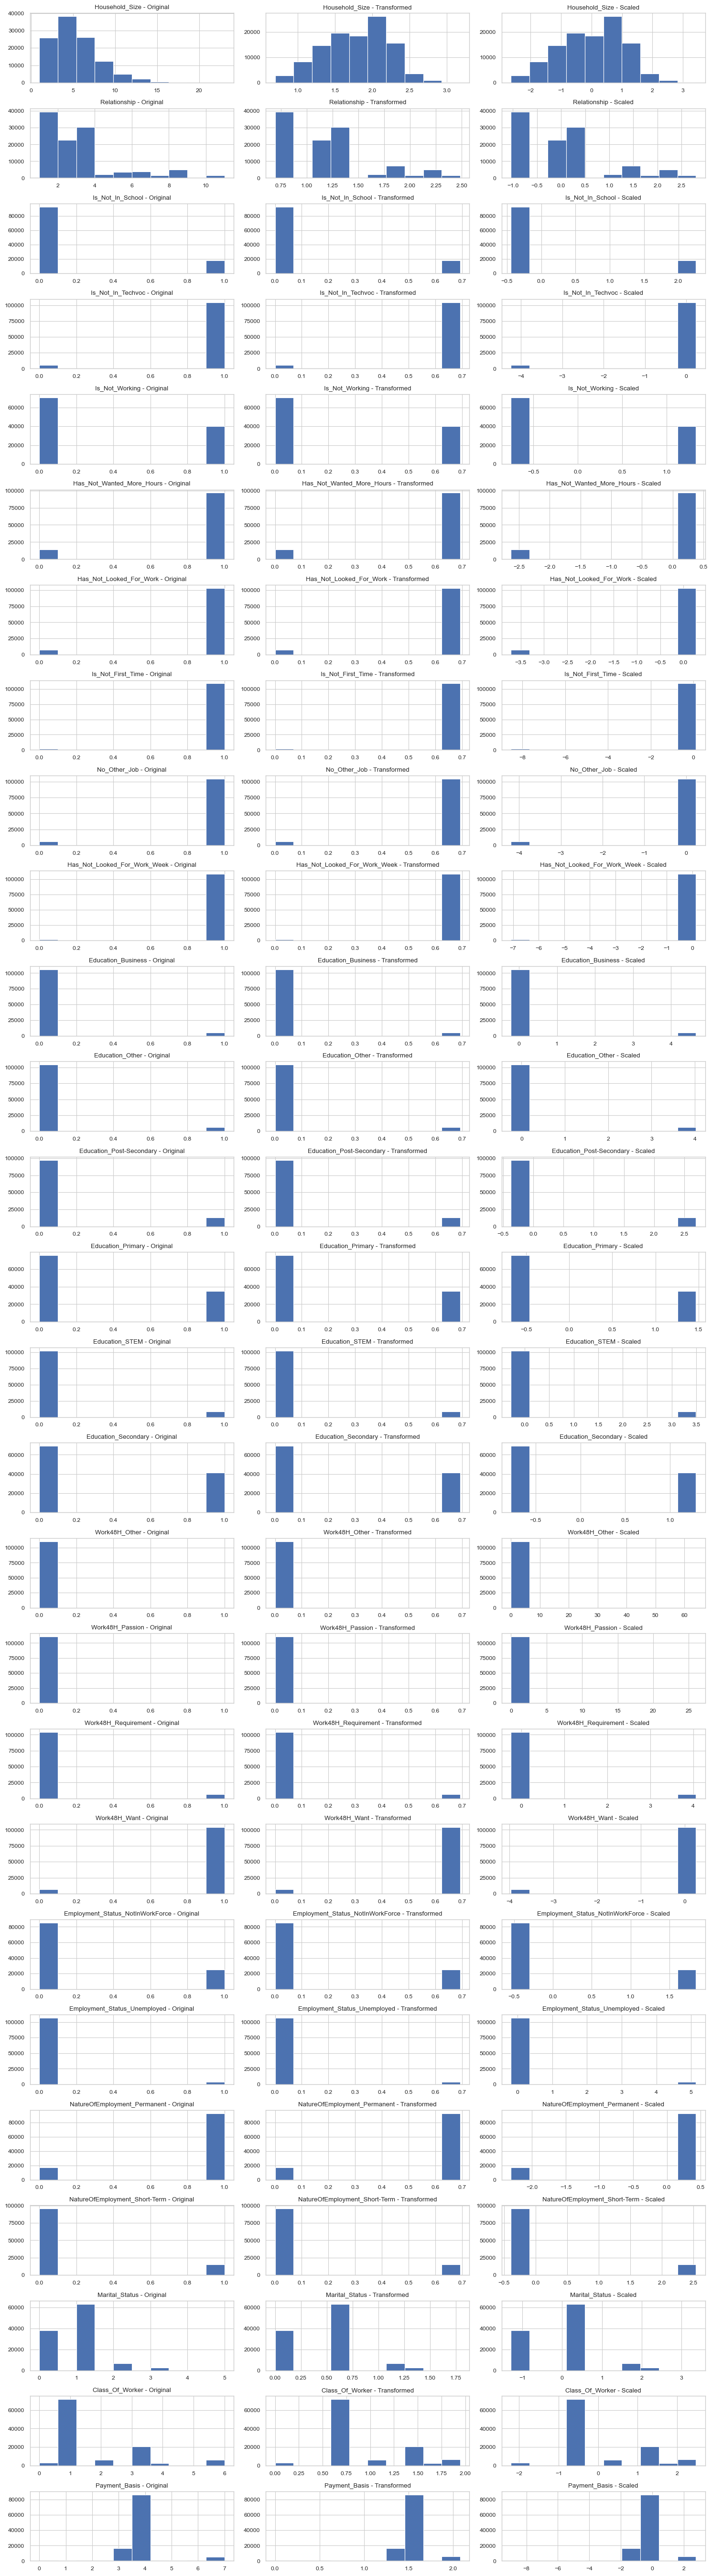

In [ ]:
DT.visualize(scaled=True)

## Train-Test Split
This section is dedicated to splitting the dataset into training and testing sets. For consistency, the data will be split using a random seed of 42. and a test_size of 0.2.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_df, df["Class_Of_Worker"], test_size=0.2, random_state=42)

## Handling Class Imbalance
To handle class imbalance, we can use the Synthetic Minority Over-sampling Technique (SMOTE) to oversample the minority classes. This technique generates synthetic samples to balance the class distribution.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initial Logistic Regression Model

In [ ]:
df

Libraries for the model

In [ ]:
from logistic_model import train_logistic_regression, load_logistic_model
from sklearn.metrics import classification_report

In [ ]:
df_copy = df.copy() # copy of original dataframe just to avoid any changes to original dataframe

Preparing data from data frame

In [ ]:
features = ['PUFPWGTFIN', 'PUFPSU', 'PUFHHSIZE', 'PUFC03_REL',
       'PUFC05_AGE', 'PUFC06_MSTAT', 'PUFC07_GRADE', 'PUFC08_CURSCH',
       'PUFC09_GRADTECH', 'PUFC11_WORK', 'PUFC12_JOB', 'PUFC16_PKB',
       'PUFC17_NATEM', 'PUFC18_PNWHRS', 'PUFC19_PHOURS', 'PUFC20_PWMORE',
       'PUFC21_PLADDW', 'PUFC22_PFWRK', 'PUFC23_PCLASS', 'PUFC24_PBASIS',
       'PUFC26_OJOB', 'PUFC28_THOURS', 'PUFC29_WWM48H', 'PUFC30_LOOKW',
       'PUFC36_AVAIL', 'PUFC38_PREVJOB', 'PUFC40_POCC', 'PUFC41_WQTR',
       'PUFC43_QKB', 'PUFNEWEMPSTAT', 'Education', 'Rural_Area'] # removed 'Program' because it was causing error in model training
target = 'PUFC23_PCLASS'


Training the model (run once or conditionally). Also, the model will be saved in logistic_model.pkl

In [ ]:
train_logistic_regression(df_copy, features, target)

Load the model and scaler

In [ ]:
saved = load_logistic_model()
model = saved['model']
scaler = saved['scaler']


Using the model for prediction

In [ ]:
X_test_scaled = scaler.transform(df[features])  # example batch only
y_pred = model.predict(X_test_scaled)

Results

In [ ]:
print(classification_report(df_copy[target], y_pred))

The classification report shows that the model achieved an overall accuracy of 1.00, indicating perfect performance on the dataset. However, this unusually high accuracy may suggest the presence of class imbalance or overfitting. Upon further inspection, the performance per class reveals the following:

* Class 1 is the dominant class with 141,556 support. It achieves perfect precision, recall, and F1-score, which is expected due to the large number of samples.

* Classes 0, 2, 3, 4, and 6 also demonstrate near-perfect performance with precision, recall, and F1-scores close to or equal to 1.00, indicating that the model performs very well on these classes.

* Class 5, however, is problematic. Despite having a precision of 0.90, it suffers from a low recall of 0.60, meaning the model fails to identify 40% of actual Class 5 instances. Its F1-score drops to 0.72, which is significantly lower than the other classes. This class also has very low support with only 216 samples, contributing to its poor performance.



There are two main issues as seen from the results. Firstly, Class 1 heavily outweighs all other classes, making the model biased toward predicting this class. This imbalance can skew performance metrics and mask poor detection of minority classes. On the other hand, Class 5 being a minority class with very low training samples struggles to generalize well on this class, as shown by the low recall, resulting in many false negatives.